PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


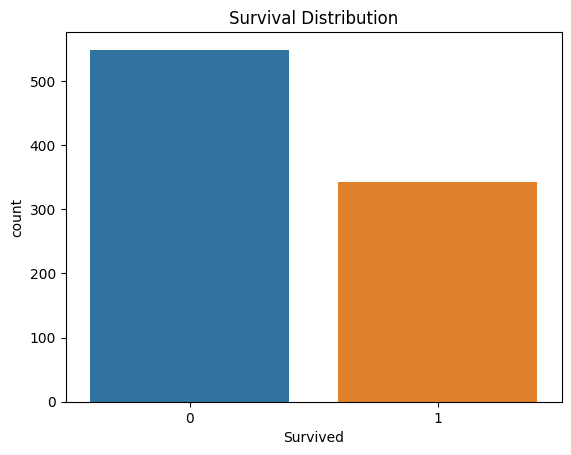

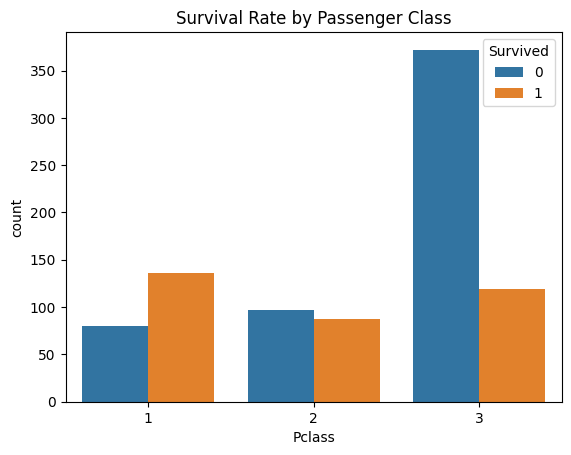

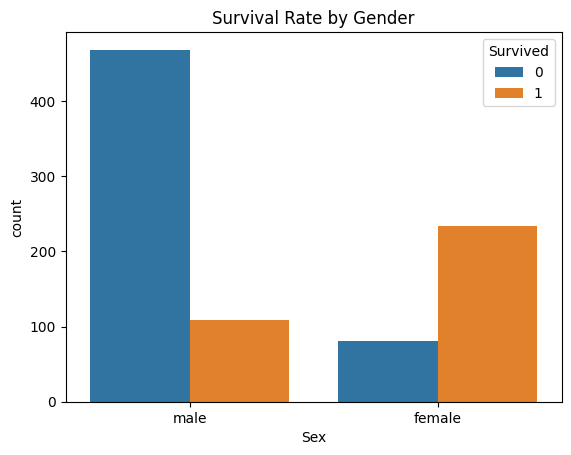

/tmp/ipykernel_33/3410313751.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
/tmp/ipykernel_33/3410313751.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

[[91 14]
 [16 58]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       105
           1       0.81      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179

Accuracy: 0.8324022346368715
[[95 10]
 [17 57]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       105
           1       0.85      0.77      0.81        74

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179

Final Accuracy: 0.8491620111731844


In [3]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

# Load the Titanic dataset from the specified path
data = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')

# Display the first few rows to inspect the data
data.head()

# Check and display the count of missing values for each column
missing_data = data.isnull().sum()
print(missing_data)

# Visualize the distribution of survivors in the dataset
sns.countplot(x='Survived', data=data)
plt.title('Survival Distribution')
plt.show()

# Visualize the relationship between class and survival
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Survival Rate by Passenger Class')
plt.show()

# Analyze the survival rate by gender
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Survival Rate by Gender')
plt.show()

# Fill missing Age values with the median
data['Age'].fillna(data['Age'].median(), inplace=True)

# Drop the Cabin column due to excessive missing values
data.drop(columns=['Cabin'], inplace=True)

# Fill missing Embarked values with the most frequent value
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Convert categorical variables into numerical indicators
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Create a new feature for family size
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

# Drop irrelevant columns
data.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

# Show the cleaned and preprocessed data
data.head()

# Define features (X) and the target variable (y)
X = data.drop(columns=['Survived'])
y = data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model with the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = rf_model.predict(X_test)

# Evaluate the model's performance
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print('Accuracy:', accuracy_score(y_test, predictions))

# Perform GridSearch to fine-tune hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize and fit the GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Use the best estimator to make final predictions
best_rf_model = grid_search.best_estimator_
final_predictions = best_rf_model.predict(X_test)

# Evaluate the tuned model's performance
print(confusion_matrix(y_test, final_predictions))
print(classification_report(y_test, final_predictions))
print('Final Accuracy:', accuracy_score(y_test, final_predictions))
